In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

df = pd.read_excel('/content/dumi_scaled_result.xlsx')
df

,Unnamed: 0,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,bottom_area,dth_cnt,injpsn_cnt,dth_hnl_dmge_cnt,prprty_dmge_amt,...,mub_yn_Y,emrg_crg_oper_yn_Y,fld_fire_se_기타,fld_fire_se_논/밭두렁으로부터확대,fld_fire_se_담뱃불,fld_fire_se_미상,fld_fire_se_쓰레기소각장에서확대,fld_fire_ign_bhf_산아래,fld_fire_ign_bhf_산중턱,fld_fire_ign_bhf_평지
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,2,0,114,71,0,0,0,8860,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,6672,...,0,0,0,0,0,0,0,0,0,0
4,4,1,10,0,1448,207,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2263,1,1,0,853,12,0,0,0,326,...,0,0,0,0,0,0,0,0,0,0
2002,2266,1,2,0,418,211,0,0,0,66,...,0,0,0,0,0,0,0,0,0,0
2003,2267,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004,2268,0,0,0,0,0,0,0,0,194,...,0,0,0,0,0,0,0,0,0,0


XGBoost - R-squared: 0.7645553707299179


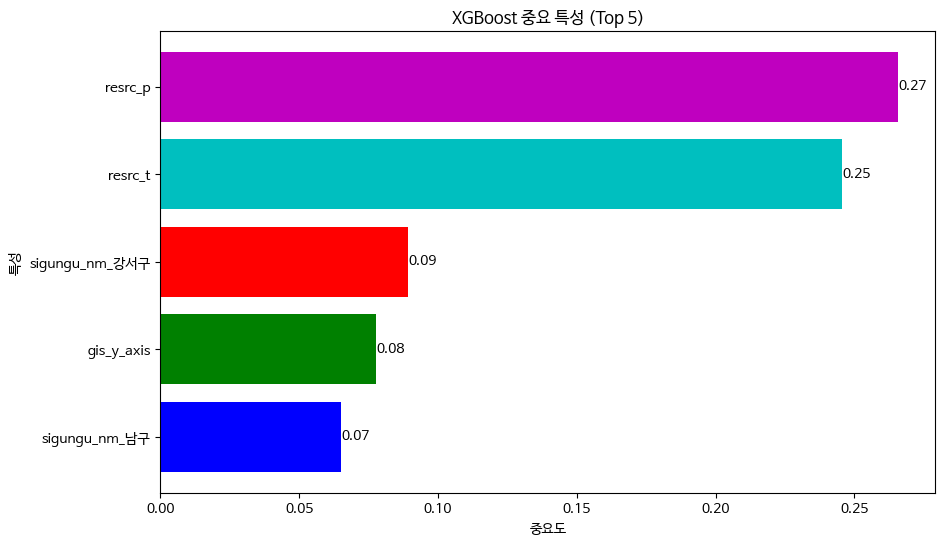

Top 5 Important Features (XGBoost):
sigungu_nm_남구: 0.07
gis_y_axis: 0.08
sigungu_nm_강서구: 0.09
resrc_t: 0.25
resrc_p: 0.27


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 종속 변수(y)와 독립 변수(X) 분리
X = df.drop(['spt_frstt_dist', 'frstt_nm_강서소방서'], axis=1)  # 독립 변수들
y = df['spt_frstt_dist']  # 종속 변수

# 데이터 분할: 학습 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

# XGBoost 모델 예측 및 R-squared 출력
y_pred_xgb = model_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - R-squared:", r2_xgb)

# XGBoost 모델에서 중요한 특성 출력
feature_importance_xgb = model_xgb.feature_importances_

# 중요도 시각화 (XGBoost, 상위 5개 중요 특성)
plt.figure(figsize=(10, 6))
sorted_idx_xgb = feature_importance_xgb.argsort()[-5:]  # 상위 5개 중요 특성
colors = ['b', 'g', 'r', 'c', 'm']  # 각 막대에 적용할 색상
plt.barh(range(5), feature_importance_xgb[sorted_idx_xgb], color=colors)
plt.yticks(range(5), X.columns[sorted_idx_xgb])
plt.title("XGBoost 중요 특성 (Top 5)")
plt.xlabel("중요도")
plt.ylabel("특성")

# 각 막대에 중요도 숫자 출력
for i, v in enumerate(feature_importance_xgb[sorted_idx_xgb]):
    plt.text(v, i, f"{v:.2f}", color='black', va='center')

plt.show()

# 상위 5개 중요 특성 출력 (XGBoost)
top_5_features_xgb = X.columns[sorted_idx_xgb]
top_5_importance_xgb = feature_importance_xgb[sorted_idx_xgb]
print("Top 5 Important Features (XGBoost):")
for feature, importance in zip(top_5_features_xgb, top_5_importance_xgb):
    print(f"{feature}: {importance:.2f}")
